# Kinematic Comparison of SM Higgs Boson Decays and WW-Diboson Production
This notebook shows a simple analysis comparing the kinematic properties of events from two processes: the Standard Model (SM) Higgs boson decaying into two W bosons (H→WW) and the SM WW-diboson production, which serves as a background. The goal is to explore and visualize the differences in these processes, which can help in distinguishing between signal (H$\rightarrow$WW) and background (WW-diboson) events in a particle physics analysis. Let's get started!

<CENTER>
    <a href="http://opendata.atlas.cern" class="icons"><img src="../../images/ATLASOD.gif" style="width:40%"></a>
</CENTER>

## Higgs Boson to WW Decay:
The first process we are examining is the decay of the Higgs boson into two W bosons (H$\rightarrow$WW). According to the Standard Model, the Higgs boson is responsible for giving mass to other particles through the Higgs mechanism. When the Higgs boson decays, it can produce a pair of W bosons, which are heavy gauge bosons that mediate the weak nuclear force.

The Feynman diagram below represents this decay process. The Higgs boson (H) decays into two W bosons, which can further decay into leptons (like electrons or muons) and neutrinos. These final states can be detected in particle detectors, and the kinematic properties of the events (such as missing transverse energy and number of jets) can be used to identify Higgs boson decays.

<CENTER><img src="../../images/fig_01a.png" style="width:30%"></CENTER>

## WW-Diboson Production:
The second process is the production of a pair of W bosons through Standard Model WW-diboson production. This is a background process because it also leads to final states with two W bosons, but without the involvement of the Higgs boson. In proton-proton collisions (like those at the Large Hadron Collider), WW pairs can be produced via interactions between quarks and gluons, as depicted in the Feynman diagram below.

The WW-diboson production is a significant background for Higgs boson searches because the final state of two W bosons is identical to that of the H$\rightarrow$WW signal. Therefore, distinguishing between the two based on their kinematic distributions is critical for identifying Higgs events.
<CENTER><img src="../../images/fig1b.png" style="width:26%"></CENTER>

## Running a Jupyter notebook
A Jupyter notebook consists of cell blocks, each containing lines of Python code. Each cell can be run independently of each other, yielding respective outputs below the cells. Conventionally,cells are run in order from top to bottom.

- To run the whole notebook, in the top menu click Cell $\to$ Run All.
- To propagate a change you've made to a piece of code, click Cell $\to$ Run All Below.
- You can also run a single code cell, by clicking Cell $\to$ Run Cells, or using the keyboard shortcut Shift+Enter.

For more information, refer to [How To Use Jupyter Notebooks](https://www.codecademy.com/article/how-to-use-jupyter-notebooks).

By the end of this notebook you will be able to:
1. Learn to process large data sets using cuts
2. Understand some general principles of a particle physics analysis
3. Discover the Z boson!

## The Analysis

We begin by importing the `ROOT` library, a tool widely used in High Energy Physics (HEP) for data analysis, visualization, and handling large datasets. The `%jsroot` on command enables JavaScript-based interactive plots in the notebook environment, allowing us to visualize the outputs directly in the browser.

In [1]:
import ROOT
%jsroot on

Next, we load the datasets for the background (WW-diboson events) and signal (Higgs boson decaying to two W bosons). These datasets are stored in `.root` files. We use the `TChain()` method and the `atlas open magic` package to open these files, and extract the event trees (analysis) containing the relevant event data. We also check the number of entries (events) in each tree to get an idea of the data size.

In [ ]:
#install required packages. Note that --user is only required on SWAN (but it shouldn't cause problems elsewhere).
%pip install --user atlasopenmagic

In [ ]:
# Now we have to do a little bit of work to make sure that atlasopenmagic is available in our python path
# This is because SWAN by default does not include the local package installation area in the PYTHONPATH
# Again, this is not necessary on binder or colab
import sys
import os
sys.path += [ f'{os.environ["HOME"]}/.local/lib/python{sys.version_info.major}.{sys.version_info.minor}/site-packages' ]

# Now we can safely import atlasopenmagic
import atlasopenmagic as atom

In [ ]:
# Now let's see what releases are available to us
atom.available_releases()

In [5]:
# And let's plan to use the latest release of Open Data for Outreach and Education
atom.set_release('2025e-13tev-beta')

Fetching and caching all metadata for release: 2025e-13tev-beta...
Fetched 374 datasets so far...
Successfully cached 374 datasets.
Active release: 2025e-13tev-beta. (Datasets path: REMOTE)


In [ ]:
samples_list = {
    r'Background Diboson':      {'dids': [700601, 700602, 700603, 700604, 700605], 'color': 'red'},
    r'Signal $H #rightarrow WW$':     {'dids': [345324, 345948], 'color': 'blue'}
}

# In case you are working on a system that doesn't have xrootd, you can use the https protocol to read 
# files with the following line:
# mc_samples = atom.build_dataset(samples_list, skim='2to4lep', protocol='https', cache = True)

mc_samples = atom.build_dataset(samples_list, skim='2to4lep', protocol='root')

samples = mc_samples

print(samples)

In [7]:
signal_chain = ROOT.TChain("analysis")
background_chain = ROOT.TChain("analysis")

In [8]:
for name_sample in samples:
    for url in samples[name_sample]['list']:
        if 'Background' in name_sample:
            background_chain.Add(url)
        else:
            signal_chain.Add(url)
        # print(url)

In [9]:
signal_entries = signal_chain.GetEntries()
print(f"Number of events in the H->WW dataset: {signal_entries}")

background_entries = background_chain.GetEntries()
print(f"Number of events in the diboson dataset: {background_entries}")

Number of events in the H->WW dataset: 196457
Number of events in the diboson dataset: 487681


After loading the data, we set up a `TCanvas`, which acts as the drawing area for the plots we will generate. A canvas is like a blank sheet of paper on which we can plot histograms or graphs. The parameters for the canvas specify its size and title.

In [10]:
c = ROOT.TCanvas("testCanvas","a first way to plot a variable",800,600)

In this analysis, we are interested in comparing two key kinematic variables: the missing transverse energy (`met`) and the number of jets (`jet_n`) in each event. To do this, we define histograms for both variables for both the background (WW-diboson) and signal (Higgs$\rightarrow$WW) datasets. Each histogram is initialized with a specific range and number of bins.

In [11]:
h_bgs = ROOT.TH1F("h_bgs","Example plot: Missing transverse energy; MET [GeV]; Arbitray Units",20,0,200)
h2_bgs = ROOT.TH1F("h2_bgs","Example plot: Number of Jets; jet_n; Arbitray Units",10,0,10)

h_sig = ROOT.TH1F("h_sig","Example plot: Missing transverse energy; MET [GeV]; Arbitray Units",20,0,200)
h2_sig = ROOT.TH1F("h2_sig","Example plot: Number of Jets; jet_n; Arbitray Units",10,0,10)

Now we fill these histograms with data. We loop over all the events in both the background and signal datasets. For each event, we extract the missing transverse energy (which we convert from MeV to GeV by dividing by 1000) and the number of jets. The histograms are filled with these values for each event.

In [12]:
for event in background_chain:
    h_bgs.Fill((background_chain.met))
    h2_bgs.Fill(background_chain.jet_n)

print("Background processed.")

for event in signal_chain:
    h_sig.Fill((signal_chain.met))
    h2_sig.Fill(signal_chain.jet_n)
        
print("Signal processed.")

Background processed.
Signal processed.


Once the histograms are filled, we normalize them. This ensures that the total area under each histogram equals 1, allowing us to compare the shapes of the distributions rather than just the number of events. This step is important for making a meaningful comparison between the signal and background.

In [13]:
scale_bgs = h_bgs.Integral()
h_bgs.Scale(1/scale_bgs)

scale_sig = h_sig.Integral()
h_sig.Scale(1/scale_sig)

Next, we apply some styling to the histograms, such as setting different colors and fill styles for the signal and background histograms. This helps to visually differentiate between them. We also create a legend that labels the signal and background histograms, making the plot easier to interpret.

In [14]:
h_bgs.SetFillStyle(3001)
h_bgs.SetFillColor(4)
h_bgs.SetLineColor(4)

h_sig.SetFillStyle(3003)
h_sig.SetFillColor(2)
h_sig.SetLineColor(2)

legend=ROOT.TLegend(0.5,0.7,0.9,0.9)
legend.AddEntry(h_bgs,"Background (WW) ","l")
legend.AddEntry(h_sig,"Signal (H #rightarrow WW)","l")

Finally, we draw the histograms on the canvas. The signal and background histograms are superimposed so that we can directly compare their distributions. The legend is added to the plot for clarity, and the `TCanvas.Draw()` command renders the canvas with the plotted histograms.

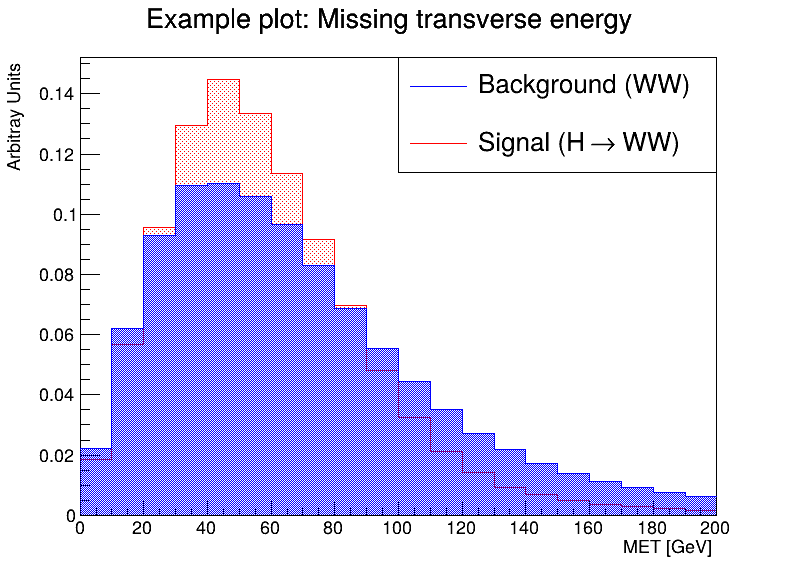

Info in <TCanvas::Print>: png file HWW_MET_comparison.png has been created


In [15]:
h_sig.SetStats(0)
h_bgs.SetStats(0)

h_sig.Draw("hist")
h_bgs.Draw("histsame")
legend.Draw()
c.Draw()

# If you want a copy of your plot locally, uncomment the following line
# c.SaveAs("HWW_MET_comparison.pdf") # pdf image

This plot compares the missing transverse energy (MET) distribution between the WW-diboson background (in blue) and the Higgs boson decaying to WW signal (in red).

The background (WW) events have a broader distribution, extending toward higher MET values, whereas the signal (H$\rightarrow$WW) tends to have higher MET values more concentrated between 30 GeV and 90 GeV. This suggests that events from the Higgs signal might exhibit different missing energy characteristics compared to the WW background, providing a possible way to distinguish between the two processes.

We repeat this process for the second variable, the number of jets (`jet_n`), normalizing the histograms and plotting them side by side for comparison.

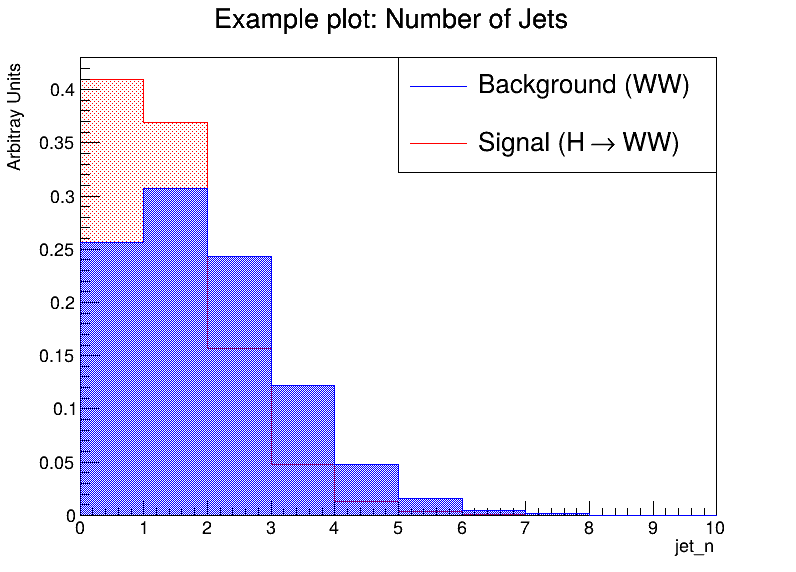

Info in <TCanvas::Print>: png file HWW_jet_n_comparison.png has been created


In [16]:
scale2_bgs = h2_bgs.Integral()
h2_bgs.Scale(1/scale2_bgs)

scale2_sig = h2_sig.Integral()
h2_sig.Scale(1/scale2_sig)

h2_bgs.SetFillStyle(3001)
h2_bgs.SetFillColor(4)
h2_bgs.SetLineColor(4)

h2_sig.SetFillStyle(3003)
h2_sig.SetFillColor(2)
h2_sig.SetLineColor(2)

legend=ROOT.TLegend(0.5,0.7,0.9,0.9)
legend.AddEntry(h2_bgs,"Background (WW) ","l")
legend.AddEntry(h2_sig,"Signal (H #rightarrow WW)","l")

h2_sig.SetStats(0)
h2_bgs.SetStats(0)
h2_sig.Draw("hist")
h2_bgs.Draw("histsame")
legend.Draw()
c.Draw()

# If you want a copy of your plot locally, uncomment the following line
# c.SaveAs("HWW_jet_n_comparison.pdf") # pdf image

This histogram compares the number of jets observed in the events for the WW-diboson background (blue) and the Higgs signal (red).

Jets are produced by quarks and gluons in high-energy collisions, and their count can help identify the nature of the process. Both the signal and background distributions peak at low jet counts (around 0-1 jets), indicating that both processes are dominated by events with fewer jets. 

However, the background tends to have a slightly broader tail extending to higher jet counts, which can indicate more complex final states in WW events compared to H→WW. This could be a useful distinguishing feature in an analysis.

## Final remarks 

In this notebook, we performed a simple kinematic comparison between two important Standard Model processes: the Higgs boson decay to two W bosons (H$\rightarrow$WW) and the WW-diboson background. By analyzing the missing transverse energy (MET) and the number of jets in these events, we explored how the signal and background distributions differ, providing insight into how these variables can be used to separate signal from background in a typical particle physics analysis.

This notebook serves as a foundation for more advanced analyses, where such comparisons are important in understanding the nature of the data and identifying new physics. Future iterations of this analysis could incorporate machine learning techniques or more sophisticated statistical methods to improve signal-background discrimination.